In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

In [37]:
train = pd.read_csv("train.csv")

In [38]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
train = train.set_index('PassengerId')

In [40]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
train.shape

(891, 11)

In [42]:
datadict = pd.DataFrame(train.dtypes)
datadict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [43]:
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [44]:
datadict['Count']=train.count()
datadict


,0,MissingVal,Count
Survived,int64,0,891
Pclass,int64,0,891
Name,object,0,891
Sex,object,0,891
Age,float64,177,714
SibSp,int64,0,891
Parch,int64,0,891
Ticket,object,0,891
Fare,float64,0,891
Cabin,object,687,204


In [45]:
datadict['NUnique']=train.nunique()
datadict


,0,MissingVal,Count,NUnique
Survived,int64,0,891,2
Pclass,int64,0,891,3
Name,object,0,891,891
Sex,object,0,891,2
Age,float64,177,714,88
SibSp,int64,0,891,7
Parch,int64,0,891,7
Ticket,object,0,891,681
Fare,float64,0,891,248
Cabin,object,687,204,147


In [46]:
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,Count,NUnique
Survived,int64,0,891,2
Pclass,int64,0,891,3
Name,object,0,891,891
Sex,object,0,891,2
Age,float64,177,714,88
SibSp,int64,0,891,7
Parch,int64,0,891,7
Ticket,object,0,891,681
Fare,float64,0,891,248
Cabin,object,687,204,147


In [47]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [48]:
train.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


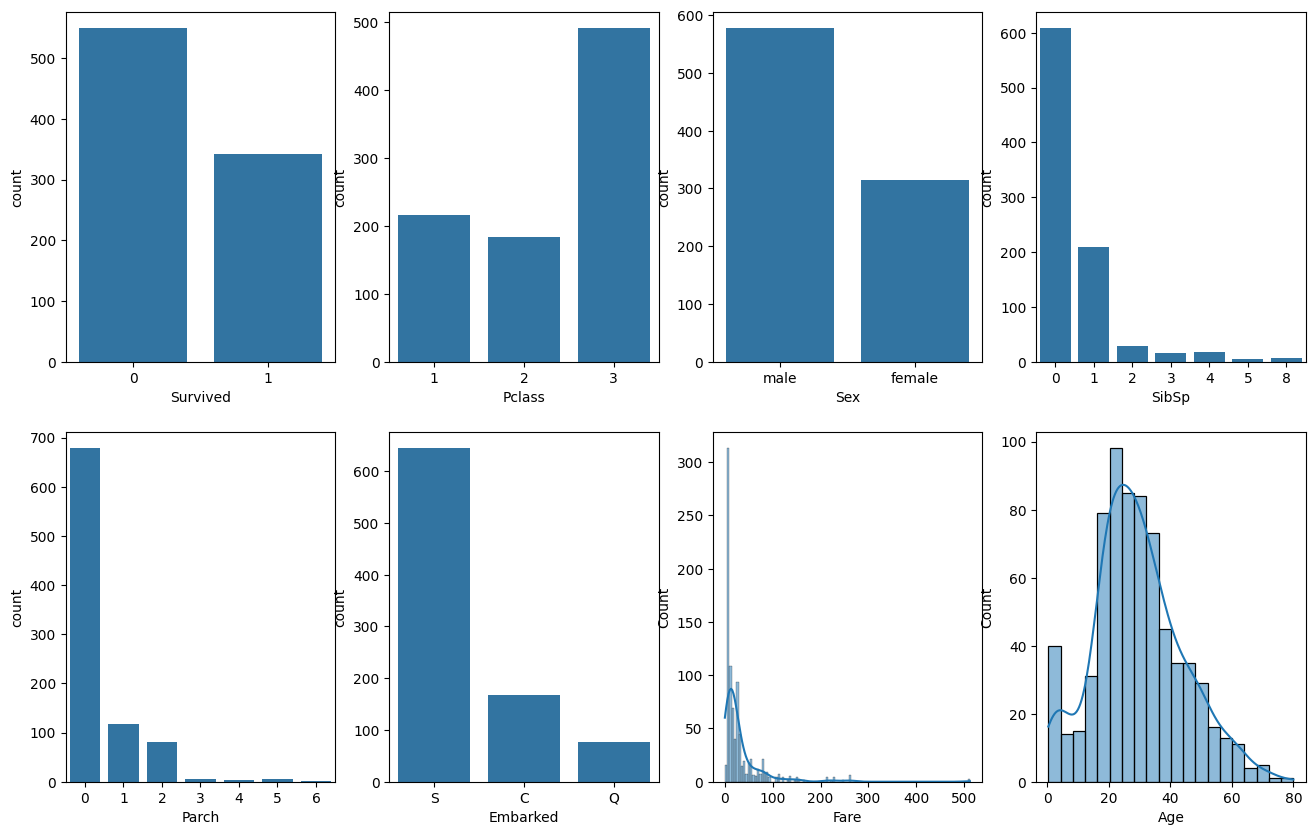

In [49]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x='Survived', data=train, ax=axes[0, 0])
sns.countplot(x='Pclass', data=train, ax=axes[0, 1])
sns.countplot(x='Sex', data=train, ax=axes[0, 2])
sns.countplot(x='SibSp', data=train, ax=axes[0, 3])
sns.countplot(x='Parch', data=train, ax=axes[1, 0])
sns.countplot(x='Embarked', data=train, ax=axes[1, 1])
sns.histplot(train['Fare'], kde=True,ax=axes[1,2])
sns.histplot(train['Age'].dropna(),kde=True,ax=axes[1,3])
plt.show()

<Axes: xlabel='Survived', ylabel='Fare'>

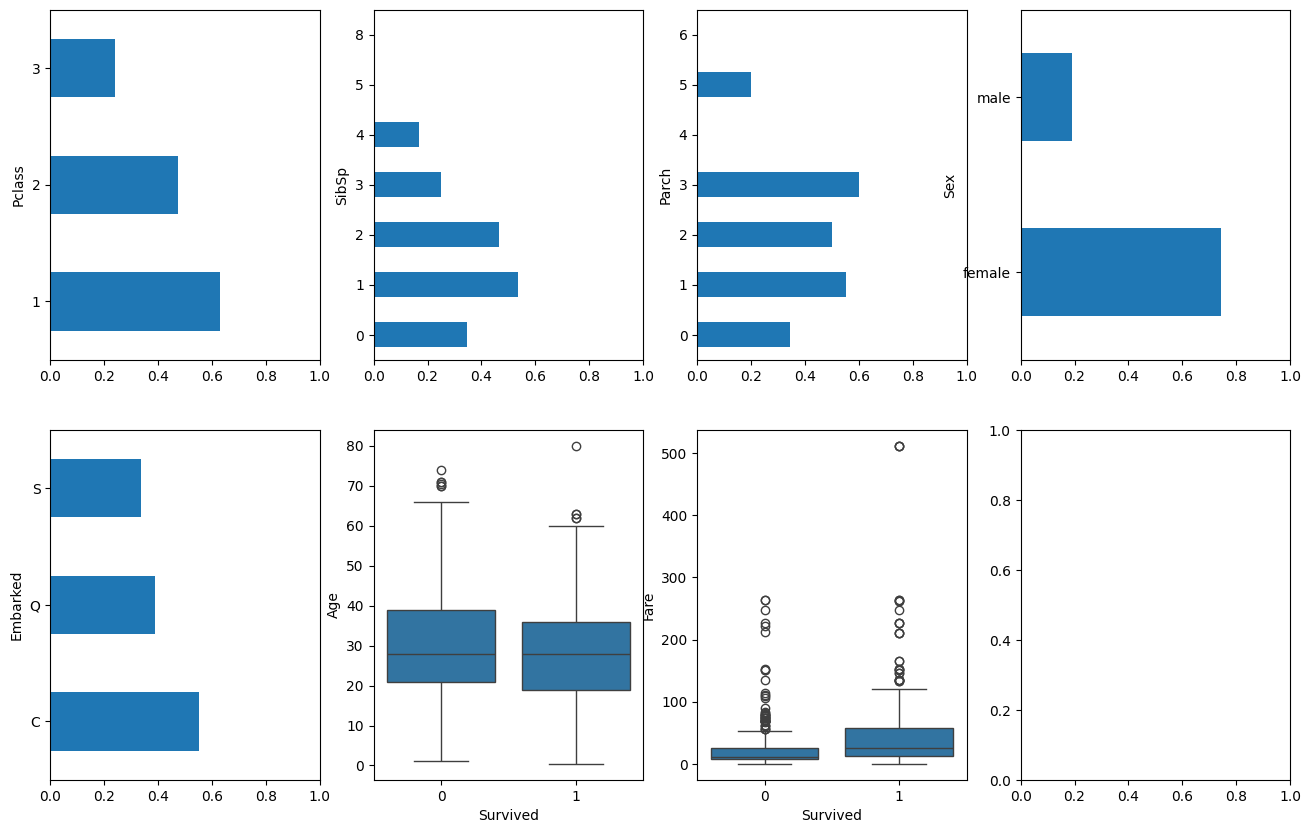

In [50]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

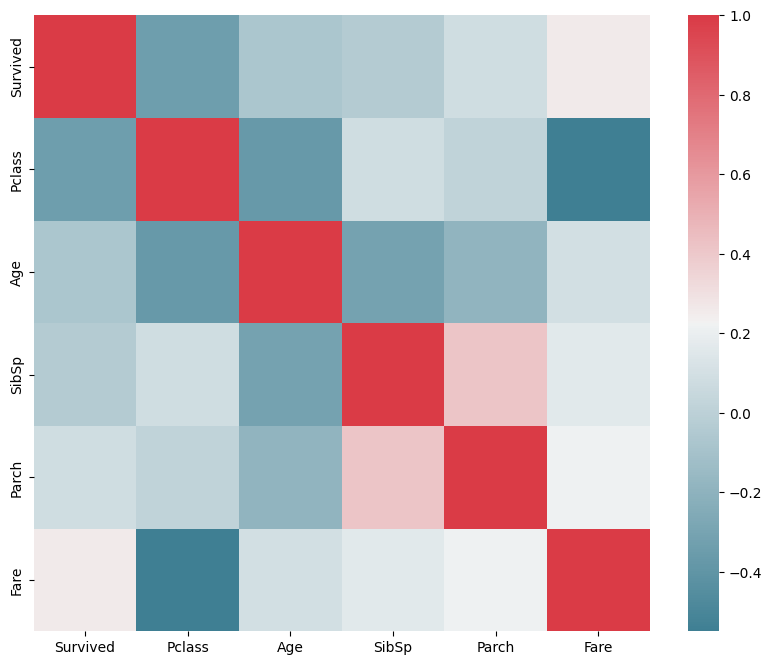

In [51]:
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

f, ax = plt.subplots(figsize=(10, 8))
corr = numeric_columns.corr()
mask = np.zeros_like(corr, dtype=bool)

sns.heatmap(corr,
            mask=mask,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [52]:
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
train.title.value_counts().reset_index()

,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


In [53]:
print((train.Fare == 0).sum())

15


In [54]:
train.Fare.mean()

32.204207968574636

In [55]:
train.Cabin.isnull().mean()

0.7710437710437711

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  title     890 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [57]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'title'],
      dtype='object')

In [63]:
trainML = train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'title']]
trainML = trainML.dropna()
trainML.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
title       0
dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [65]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()

0.6923076923076923

In [66]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

0.7417582417582418

In [67]:
X_pclass = pd.get_dummies(trainML['Pclass']).values
y = trainML['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()


0.6703296703296703